# Week 4 - Classification

This week, we shift from gathering human textual classifications through crowdsourcing, to using machine learning models and algorithms that train on those human classifications and extend them to documents far too numerous to read. If you recall, *clustering* allows us to stably partition text data (e.g., documents, turns of conversation) according to all patterns of covariation among available text features. *Classification*, by contrast, partitions text data according to only those features and their variation that enable us to mimic and extrapolate human annotations.

In this notebook, we will show how to use a variety of classification methods, including Naïve Bayes, Logistic regression, K-nearest neighbor, decision trees and random forests, support vector machines and even a simple neural network, the perceptron. We will also demonstrate ensemble techniques that can link several such methods into a single, more accurate, classification pipeline. We will finally learn to use conventions and metrics to evaluate classifier performance on out-of-sample data. 

For this notebook we will be using the following packages.

In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

#All these packages need to be installed from pip
#For ML
import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition

import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interp

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas
import requests
import json
import math

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

# Simple Simulated Examples

Here we create a sandbox for you to explore different types of classified data and how different statistical classifiers perform on each type.

## Generating example data

We start by loading one of the "cartoon" or simplified data sets and then dividing it into training and testing sets. To maximize our ability to visualize, each dataset involves two classes, colored yellow and blue, arrayed along two dimensions (`x` and `y`). 

The four data patterns include: 
+ `random` in which the two classes are randomly distributed across both dimensions
+ `andSplit` in which the two classes are linearly split along one of two dimensions (e.g., men like Adidas)
+ `xorSplit` in which the two classes are split, oppositely, along each dimension (e.g., old ladies and young men like Nikes)
+ `targetSplit` in which one class is nested within the other in two dimensions (e.g., middle aged, middle income people like vintage Mustangs)
+ `multiBlobs` in which 5 classes are placed as bivariate Gaussians at random locations

`noise` is a variable [0-1] that ranges from no noise in the prescribed pattern [0] to complete noise/randomness [1].

Uncomment (remove the # in front of) each dataset, one at a time, and then run the cell and subsequent cells to examine how each machine learning approach captures each pattern.

In [2]:
noise = .2

#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.random())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.andSplit(noise))
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.xorSplit(noise)) #Please try this one
dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.targetSplit(noise))
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.multiBlobs(noise))

We can easily visualize the rendered datasets because they are generated in two dimensions.

Let's see what dfTrain, a simulated data that we just made, looks like

In [4]:
dfTrain

vect  category
335     [-0.8611662676601738, 0.1569886046564066]         1
929    [-0.3461629183156422, -0.7077745183698095]         1
941     [0.5836623233628426, -0.2763201401413751]         1
972  [-0.13637725080637814, -0.10258139376081435]         0
698  [-0.025356371431397455, -0.1644148773008533]         0
..                                            ...       ...
252  [-0.11629486885072848, -0.14401529895382956]         0
56   [-0.26247671358913793, -0.07984990848261829]         0
211     [-0.8364339015968771, 0.0930956075915171]         1
913    [-0.46799205453847975, 0.5379215622430256]         1
887    [0.08338335653130027, 0.35403068765332424]         1

[800 rows x 2 columns]

So, dfTrain has two columns, vect and category. 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


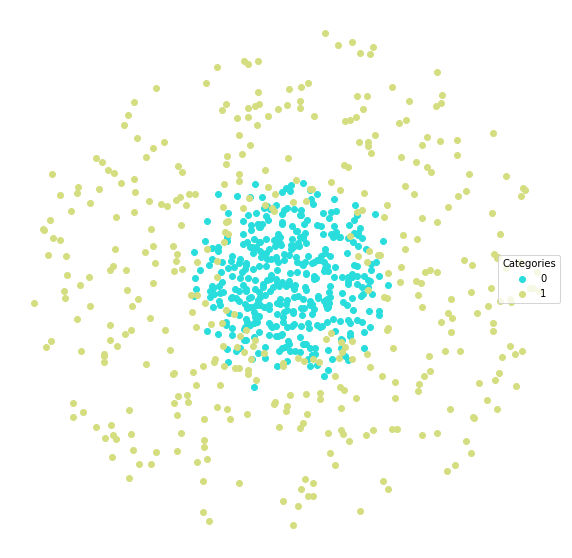

In [6]:
lucem_illud.plotter(dfTrain)

## Training a Machine Learning algorithm

We can now pick a model, there are many more options in `scikit-learn`. These are just a few examples, which array along the machine learning "tribes" described in Pedro Domingos _The Master Algorithm_.

Uncomment (remove the # in front of) each algorithm one at a time, then run the cell and subsequent cells to evaluate how it learns to understand the data.

In [7]:
#Bayes
#clf = sklearn.naive_bayes.GaussianNB()

#Analogizes
#clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up
#clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
#clf = sklearn.linear_model.LogisticRegression()

#Symbolists
#clf = sklearn.tree.DecisionTreeClassifier()
#clf = sklearn.ensemble.RandomForestClassifier()

#Connectionists
#clf = sklearn.neural_network.MLPClassifier()

#Ensemble
#clf = sklearn.ensemble.GradientBoostingClassifier()

We're using sklearn here. What is sklearn? It's an open source machine learning library for Python. We use sklearn because it features various machine learning algorithms and it works well with NumPy library. You don't need to understand the sklearn package in detail for the moment, but let's see what methods and attributes sklearn has, because we're going to use some of them:

In [ ]:
dir(sklearn)

Now we fit the model by giving it our training data

In [1]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

NameError: name 'clf' is not defined

Here, "stack" function is used. Why did we use stack function here? This is because dfTrain['vect'] is a sequence, while clf.fit() takes an array element. Let's see what dfTrain['vect'] looks like:

In [9]:
dfTrain['vect']

335       [-0.8611662676601738, 0.1569886046564066]
929      [-0.3461629183156422, -0.7077745183698095]
941       [0.5836623233628426, -0.2763201401413751]
972    [-0.13637725080637814, -0.10258139376081435]
698    [-0.025356371431397455, -0.1644148773008533]
                           ...                     
252    [-0.11629486885072848, -0.14401529895382956]
56     [-0.26247671358913793, -0.07984990848261829]
211       [-0.8364339015968771, 0.0930956075915171]
913      [-0.46799205453847975, 0.5379215622430256]
887      [0.08338335653130027, 0.35403068765332424]
Name: vect, Length: 800, dtype: object

And let's see what np.stack(dfTrain['vect']) does:

In [ ]:
np.stack(dfTrain['vect'])

As you can see, stack function takes a sequence of arrays (which have the same shape) and joins them along a new axis.

## Algorithm evaluation

We can look at few measurements of each classifier's performance by using the testing set

In [10]:
lucem_illud.evaluateClassifier(clf, dfTest)

Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.145  0.855369   0.838384           0.789853  0.864583
1              0.145  0.855369   0.871287           0.817243  0.846154

This lets us look at which classes do better:

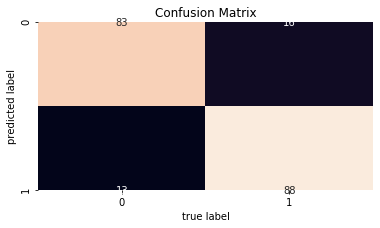

In [11]:
lucem_illud.plotConfusionMatrix(clf, dfTest)

The greater the area under the curve the better.

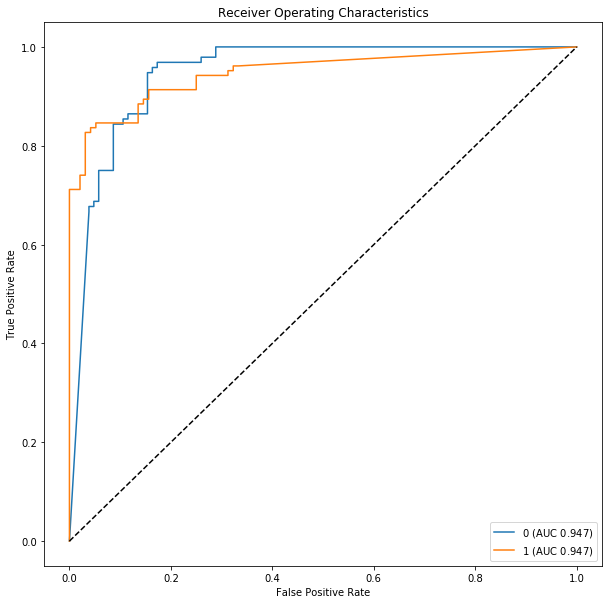

In [12]:
lucem_illud.plotMultiROC(clf, dfTest)

We can also look at the regions the classifer identifies as one class or the other:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


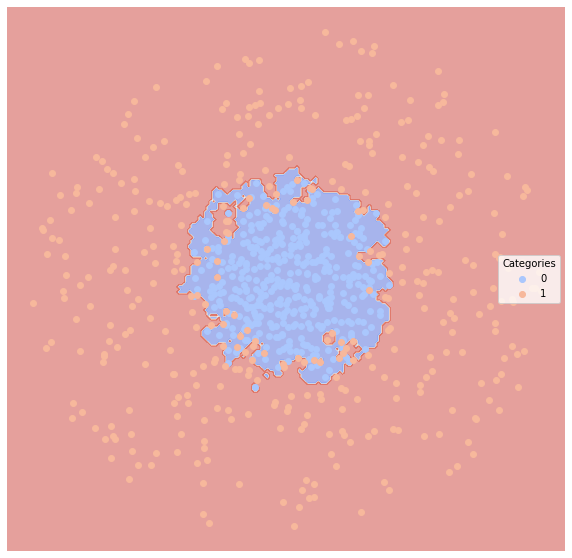

In [13]:
lucem_illud.plotregions(clf, dfTrain)

## Now we do the same for real data

Available data sets include:
+ Reddit threads "classified" by thread topic
+ 20 newsgroups "classified" by group topic
+ Senate press releases "classified" by Senator (2 senators)
+ Senate press releases "classified" by Senator (5 senators)
+ Emails classified as Spam or Ham

In [14]:
dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadReddit())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadNewsGroups())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSenateSmall())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSenateLarge())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSpam())

Loading Reddit data
Converting to vectors


In [ ]:
#Bayes
clf = sklearn.naive_bayes.GaussianNB()

#Analogizes
#clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up, but lose ROC
#clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
#clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
#clf = sklearn.linear_model.LogisticRegression()

#Symbolists
#clf = sklearn.tree.DecisionTreeClassifier()
#clf = sklearn.ensemble.RandomForestClassifier()

#Connectionists
#clf = sklearn.neural_network.MLPClassifier()

#Ensemble
#clf = sklearn.ensemble.GradientBoostingClassifier()

In [15]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [16]:
lucem_illud.evaluateClassifier(clf, dfTest)

Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                      
Tales From Tech Support    0.031348  0.956897   0.952941           0.906030   
Weeaboo Tales              0.056426  0.915796   0.906667           0.814905   
Relationships              0.068966  0.898972   0.880000           0.775942   
Bad Roommates              0.050157  0.953199   0.845238           0.820376   

                           Recall  
Category                           
Tales From Tech Support  0.931034  
Weeaboo Tales            0.860759  
Relationships            0.835443  
Bad Roommates            0.959459

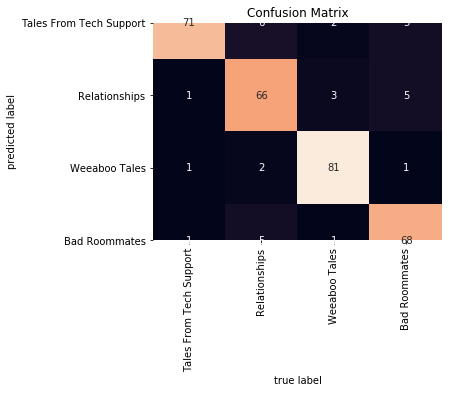

In [17]:
lucem_illud.plotConfusionMatrix(clf, dfTest)

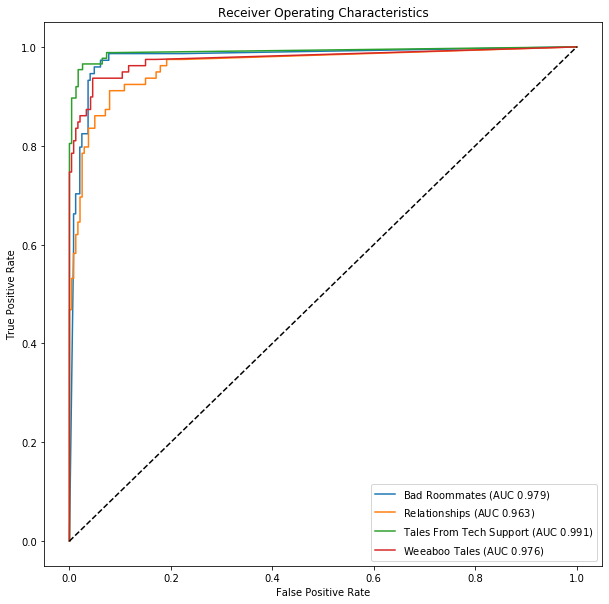

In [18]:
lucem_illud.plotMultiROC(clf, dfTest)

In [ ]:
lucem_illud.plotregions(clf, dfTrain)

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Go back through all of the cells above and generate 10 distinct artificial datasets and classify them with all of the available methods. Add a cell immediately below and describe which classifier(s) worked best with which artificially constructed data source and why. Then go through all of the empirical datasets (i.e., Newsgroups, Senate Small, Senate Large, Email Spam) and classify them with all available methods. Add a second cell immediately below and describe which classifier(s) worked best with which data set and why.

<span style="color:red">***Stretch*** (but also required) Wander through the SKLearn documentation available [here](http://scikit-learn.org/stable/), particularly perusing the classifiers. In cells following, identify and implement a new classifier that we have not yet used (e.g., AdaBoost, CART) on one artificial dataset and one real dataset (used above). Then, in the next cell describe the classifier, detail how it compares with the approaches above, and why it performed better or worse than others.

10 artificial datasets

In [9]:
noise = .2
random.seed(10)
dfTrain2, dfTest2 = lucem_illud.trainTestSplit(lucem_illud.andSplit(noise))
dfTrain3, dfTest3 = lucem_illud.trainTestSplit(lucem_illud.xorSplit(noise)) 
dfTrain4, dfTest4 = lucem_illud.trainTestSplit(lucem_illud.targetSplit(noise))
dfTrain5, dfTest5 = lucem_illud.trainTestSplit(lucem_illud.multiBlobs(noise))

In [43]:
noise = .5
random.seed(10)

dfTrain2b, dfTest2b = lucem_illud.trainTestSplit(lucem_illud.andSplit(noise))
dfTrain3b, dfTest3b = lucem_illud.trainTestSplit(lucem_illud.xorSplit(noise)) 
dfTrain4b, dfTest4b = lucem_illud.trainTestSplit(lucem_illud.targetSplit(noise))
dfTrain5b, dfTest5b = lucem_illud.trainTestSplit(lucem_illud.multiBlobs(noise))

In [44]:
noise = .8
random.seed(10)

dfTrain2c, dfTest2c = lucem_illud.trainTestSplit(lucem_illud.andSplit(noise))
dfTrain3c, dfTest3c = lucem_illud.trainTestSplit(lucem_illud.xorSplit(noise)) 
dfTrain4c, dfTest4c = lucem_illud.trainTestSplit(lucem_illud.targetSplit(noise))
dfTrain5c, dfTest5c = lucem_illud.trainTestSplit(lucem_illud.multiBlobs(noise))

In [10]:
#Bayes
clf1 = sklearn.naive_bayes.GaussianNB()

#Analogizes
clf2 = sklearn.svm.SVC(kernel = 'linear', probability = False) #slow, set probability = False to speed up
clf3 = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = False) #slower
clf4 = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
clf5 = sklearn.linear_model.LogisticRegression()

#Symbolists
clf6 = sklearn.tree.DecisionTreeClassifier()
clf7 = sklearn.ensemble.RandomForestClassifier()

#Connectionists
clf8 = sklearn.neural_network.MLPClassifier()

#Ensemble
clf9 = sklearn.ensemble.GradientBoostingClassifier()

In [3]:
models = [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8, clf9]

In [4]:
r1 = re.compile("(.*?)\s*\(")

#create a helper function to fit all models and show results together
def fit_helper(model, train, test):
    model.fit(np.stack(train['vect'], axis=0), train['category'])
    m = r1.match(str(model))
    print(m.group(1))
    print(lucem_illud.evaluateClassifier(model, test))

Begin with dfTrain2, dfTest2 (andSplit, noise = 0.2)

In [46]:
for model in models:
    fit_helper(model, dfTrain2, dfTest2)

GaussianNB
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.085  0.913462   0.891892           0.874012  0.951923
1              0.085  0.913462   0.943820           0.885843  0.875000
SVC
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.09  0.907853   0.877193           0.863455  0.961538
1               0.09  0.907853   0.953488           0.884438  0.854167
SVC
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.155  0.839744   0.782946           0.775361  0.971154
1              0.155  0.839744   0.957746           0.818404  0.708333
KNeighborsClassifier
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                             

For(andSplit, noise = 0.2), Naive Bayes, LogisticRegression, MLPClassifier have the lowest error rate (0.085)

In [47]:
for model in models:
    fit_helper(model, dfTrain2b, dfTest2b)

GaussianNB
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.275  0.726837       0.68           0.623132  0.747253
1              0.275  0.726837       0.77           0.703945  0.706422
SVC
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.275  0.724115   0.691489           0.623921  0.714286
1              0.275  0.724115   0.754717           0.698921  0.733945
SVC
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.265  0.737826   0.686275           0.632903  0.769231
1              0.265  0.737826   0.785714           0.715046  0.706422
KNeighborsClassifier
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                             

For(andSplit, noise = 0.5), GradientBoostingClassifier have the lowest error rate (0.26)

In [48]:
for model in models:
    fit_helper(model, dfTrain2c, dfTest2c)

GaussianNB
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.39  0.609044   0.611111           0.557971  0.561224
1               0.39  0.609044   0.609091           0.575089  0.656863
SVC
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.395  0.604342   0.602151           0.554086  0.571429
1              0.395  0.604342   0.607477           0.572117  0.637255
SVC
          Error_Rate      AUC  Precision  Average_Precision    Recall
Category                                                             
0              0.425  0.57553   0.561905           0.533290  0.602041
1              0.425  0.57553   0.589474           0.553633  0.549020
KNeighborsClassifier
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                 

For(andSplit, noise = 0.8), Naive Bayes and MLPClassifier have the lowest error rate (0.39)

In [51]:
for model in models:
    fit_helper(model, dfTrain3, dfTest3)

GaussianNB
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.395  0.614713   0.695652           0.605012  0.452830
1              0.395  0.614713   0.557252           0.537759  0.776596
SVC
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.375  0.636592   0.746032           0.625788  0.443396
1              0.375  0.636592   0.569343           0.552434  0.829787
SVC
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.33  0.684464    0.87037           0.680919  0.443396
1               0.33  0.684464    0.59589           0.586516  0.925532
KNeighborsClassifier
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                             

For(xorSplit, noise = 0.2), GradientBoostingClassifier have the lowest error rate (0.08)

In [52]:
for model in models:
    fit_helper(model, dfTrain3b, dfTest3b)

GaussianNB
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.485  0.515602   0.508929           0.503019  0.575758
1              0.485  0.515602   0.522727           0.513074  0.455446
SVC
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.46  0.540954   0.529412           0.516898  0.636364
1               0.46  0.540954   0.555556           0.527525  0.445545
SVC
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.285  0.712421   0.937500           0.696136  0.454545
1              0.285  0.712421   0.644737           0.640586  0.970297
KNeighborsClassifier
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                             

For(xorSplit, noise = 0.5), MLPClassifier has the lowest error rate (0.22)

In [53]:
for model in models:
    fit_helper(model, dfTrain3c, dfTest3c)

GaussianNB
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.47  0.538847   0.584615           0.546575  0.361905
1               0.47  0.538847   0.503704           0.495546  0.715789
SVC
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.435  0.573684   0.636364           0.569545  0.400000
1              0.435  0.573684   0.529851           0.515994  0.747368
SVC
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.375  0.636842   0.777778           0.626111  0.400000
1              0.375  0.636842   0.568493           0.556683  0.873684
KNeighborsClassifier
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                             

For(xorSplit, noise = 0.8), KNeighborsClassifier has the lowest error rate (0.3)

In [54]:
for model in models:
    fit_helper(model, dfTrain4, dfTest4)

GaussianNB
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.105  0.894439   0.857143           0.839710  0.950495
1              0.105  0.894439   0.943182           0.870748  0.838384
SVC
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.33  0.666667    0.60479           0.604790  1.000000
1               0.33  0.666667    1.00000           0.663333  0.333333
SVC
          Error_Rate  AUC  Precision  Average_Precision  Recall
Category                                                       
0              0.505  0.5      0.000              0.505     0.0
1              0.505  0.5      0.495              0.495     1.0
KNeighborsClassifier
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                         

For(targetSplit, noise = 0.2), GradientBoostingClassifier has the lowest error rate (0.095)

In [55]:
for model in models:
    fit_helper(model, dfTrain4b, dfTest4b)

GaussianNB
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.24  0.761305   0.723214           0.682759  0.826531
1               0.24  0.761305   0.806818           0.716609  0.696078
SVC
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.445  0.558123   0.534351           0.521679  0.714286
1              0.445  0.558123   0.594203           0.543846  0.401961
SVC
          Error_Rate  AUC  Precision  Average_Precision  Recall
Category                                                       
0               0.51  0.5       0.49               0.49     1.0
1               0.51  0.5       0.00               0.51     0.0
KNeighborsClassifier
          Error_Rate      AUC  Precision  Average_Precision    Recall
Category                                                          

For(targetSplit, noise = 0.5), MLPClassifier has the lowest error rate (0.235)

In [56]:
for model in models:
    fit_helper(model, dfTrain4c, dfTest4c)

GaussianNB
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.42  0.585965   0.544715           0.524168  0.705263
1               0.42  0.585965   0.636364           0.576970  0.466667
SVC
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0                0.5  0.505764   0.479675           0.477903  0.621053
1                0.5  0.505764   0.532468           0.527916  0.390476
SVC
          Error_Rate  AUC  Precision  Average_Precision  Recall
Category                                                       
0              0.525  0.5      0.475              0.475     1.0
1              0.525  0.5      0.000              0.525     0.0
KNeighborsClassifier
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                         

For(targetSplit, noise = 0.8), Naive Bayes has the lowest error rate (0.42)

In [57]:
for model in models:
    fit_helper(model, dfTrain5, dfTest5)

GaussianNB
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.000  1.000000   1.000000           1.000000  1.000000
1              0.092  0.862638   0.742574           0.626243  0.789474
2              0.076  0.877992   0.855769           0.726031  0.794643
3              0.016  0.977885   0.947917           0.923664  0.968085
4              0.000  1.000000   1.000000           1.000000  1.000000
SVC
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.000  1.000000   1.000000           1.000000  1.000000
1              0.088  0.873164   0.747573           0.641927  0.810526
2              0.070  0.881858   0.881188           0.746230  0.794643
3              0.018  0.976653   0.938144           0.914204  0.968085
4              0.000  1.000000   1.000000           1.000000  

For(multiBlobs, noise = 0.2), Logistic regression has the lowest average error rate (0.031)

In [58]:
for model in models:
    fit_helper(model, dfTrain5b, dfTest5b)

GaussianNB
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.050  0.929676   0.884956           0.814139  0.892857
1              0.064  0.897645   0.819149           0.715592  0.836957
2              0.054  0.913170   0.895238           0.797022  0.854545
3              0.000  1.000000   1.000000           1.000000  1.000000
4              0.064  0.893212   0.808989           0.699508  0.827586
SVC
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.048  0.930965   0.892857           0.821194  0.892857
1              0.058  0.909740   0.831579           0.740073  0.858696
2              0.054  0.913170   0.895238           0.797022  0.854545
3              0.002  0.994949   1.000000           0.991899  0.989899
4              0.066  0.892001   0.800000           0.692069  

For(multiBlobs, noise = 0.5), MLPClassifier has the lowest average error rate (0.045)

In [59]:
for model in models:
    fit_helper(model, dfTrain5c, dfTest5c)

GaussianNB
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.040  0.935267   0.910891           0.835611  0.893204
1              0.002  0.998724   0.990826           0.990826  1.000000
2              0.040  0.940949   0.907407           0.843388  0.907407
3              0.004  0.993340   0.989130           0.980379  0.989130
4              0.002  0.998783   0.988889           0.988889  1.000000
SVC
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.042  0.930413   0.910000           0.827981  0.883495
1              0.002  0.998724   0.990826           0.990826  1.000000
2              0.046  0.937122   0.882883           0.821134  0.907407
3              0.006  0.987905   0.989011           0.971511  0.978261
4              0.000  1.000000   1.000000           1.000000  

For(multiBlobs, noise = 0.8), Naive Bayes has the lowest average error rate (0.018)

Now real data

In [5]:
dfTrain_a, dfTest_a = lucem_illud.trainTestSplit(lucem_illud.loadReddit())
dfTrain_b, dfTest_b = lucem_illud.trainTestSplit(lucem_illud.loadNewsGroups())
dfTrain_c, dfTest_c = lucem_illud.trainTestSplit(lucem_illud.loadSenateSmall())
#for some reason, Senatelarge and spam do not work because data file is missing

Loading Reddit data
Converting to vectors
Loading data for: comp.sys.mac.hardware
Loading data for: comp.windows.x
Loading data for: misc.forsale
Loading data for: rec.autos
Converting to vectors
Loading senate data
Converting to vectors


In [64]:
for model in models:
    fit_helper(model, dfTrain_a, dfTest_a)

GaussianNB
                         Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                      
Tales From Tech Support    0.090909  0.859848   0.904110           0.747048   
Bad Roommates              0.156740  0.801302   0.682353           0.560699   
Weeaboo Tales              0.153605  0.894973   0.606557           0.601605   
Relationships              0.181818  0.664126   0.717949           0.415370   

                           Recall  
Category                           
Tales From Tech Support  0.750000  
Bad Roommates            0.716049  
Weeaboo Tales            0.986667  
Relationships            0.373333  
SVC
                         Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                      
Tales From Tech Support    0.003135  0.994318   1.000000           0.991771   
Bad Roommates              0.006270  0.991726   0.987654 

For Reddit data, linear SVC performs the best.

In [13]:
for model in models:
    fit_helper(model, dfTrain_b, dfTest_b)

GaussianNB
                       Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                    
rec.autos                0.093617  0.862338   0.844037           0.709979   
comp.sys.mac.hardware    0.138298  0.829971   0.751880           0.637691   
comp.windows.x           0.076596  0.914023   0.811024           0.751927   
misc.forsale             0.142553  0.788015   0.683168           0.527724   

                         Recall  
Category                         
rec.autos              0.773109  
comp.sys.mac.hardware  0.757576  
comp.windows.x         0.895652  
misc.forsale           0.663462  
SVC
                       Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                    
rec.autos                0.061702  0.936472   0.840909           0.801399   
comp.sys.mac.hardware    0.063830  0.914067   0.904762           0.819683   
comp.windo

For the Newsgroup data, MLPClassifier works the best

In [15]:
for model in models:
    fit_helper(model, dfTrain_c, dfTest_c)

GaussianNB
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
Obama       0.158358  0.836825   0.839161           0.757792  0.794702
Clinton     0.158358  0.836825   0.843434           0.808783  0.878947
SVC
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
Obama       0.005865  0.994057   0.993377           0.989731  0.993377
Clinton     0.005865  0.994057   0.994737           0.992434  0.994737
SVC
          Error_Rate  AUC  Precision  Average_Precision  Recall
Category                                                       
Obama       0.442815  0.5   0.000000           0.442815     0.0
Clinton     0.442815  0.5   0.557185           0.557185     1.0
KNeighborsClassifier
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                         

In [ ]:
For Senate small data, RandomForestClassifier works the best.

AdaBoost

In [7]:
from sklearn.ensemble import AdaBoostClassifier

In [8]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)

In [12]:
#andSplit noise = 0.2
ada.fit(np.stack(dfTrain2['vect'], axis=0), dfTrain2['category'])
m = r1.match(str(ada))
print(m.group(1))
print(lucem_illud.evaluateClassifier(ada, dfTest2))

AdaBoostClassifier
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.09  0.910219   0.920792           0.881395  0.902913
1               0.09  0.910219   0.898990           0.864846  0.917526


In [14]:
#SenateSmall
ada.fit(np.stack(dfTrain_c['vect'], axis=0), dfTrain_c['category'])
m = r1.match(str(ada))
print(m.group(1))
print(lucem_illud.evaluateClassifier(ada, dfTest_c))

AdaBoostClassifier
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
Obama       0.002933  0.996689   1.000000           0.996310  0.993377
Clinton     0.002933  0.996689   0.994764           0.994764  1.000000


For both datasets, AdaBoost works better than simple models because AdaBoost is an ensamble method that combines multiple methods.

# Clinton / Obama Press Releases

We often will not have nicely prepared data, so we will work though the proccess of cleaning and structuring in more detail here:

While the Clinton and Obama Senatorial Press Releases are not hand-coded, we can imagine that we have been given a stack of such press releases, but lost the metadata associated with which senatorial office issued which. If we label a few of them, how well can our classifier do at recovering the rest? 

In [2]:
ObamaClintonReleases = pandas.read_csv('../data/ObamaClintonReleases.csv', index_col=0)

I'm pretty sure that you're all familiar with pandas, but, just to clarify: why do we use pandas here? pandas is a Python library which is widely used for analyzing and wrangling data. In particular, pandas loads data and creates data frame, a Python object that looks familiar to us (since it looks like a excel table) and easy to work with. So, using pandas.read_csv function, we take in the csv file and convert it into a data frame. 

In [3]:
type(ObamaClintonReleases)

pandas.core.frame.DataFrame

It's a DataFrame! and it looks like this:

In [4]:
ObamaClintonReleases

download_url  \
0     https://raw.githubusercontent.com/lintool/Grim...   
1     https://raw.githubusercontent.com/lintool/Grim...   
2     https://raw.githubusercontent.com/lintool/Grim...   
3     https://raw.githubusercontent.com/lintool/Grim...   
4     https://raw.githubusercontent.com/lintool/Grim...   
...                                                 ...   
1704  https://raw.githubusercontent.com/lintool/Grim...   
1705  https://raw.githubusercontent.com/lintool/Grim...   
1706  https://raw.githubusercontent.com/lintool/Grim...   
1707  https://raw.githubusercontent.com/lintool/Grim...   
1708  https://raw.githubusercontent.com/lintool/Grim...   

                                               html_url  \
0     https://github.com/lintool/GrimmerSenatePressR...   
1     https://github.com/lintool/GrimmerSenatePressR...   
2     https://github.com/lintool/GrimmerSenatePressR...   
3     https://github.com/lintool/GrimmerSenatePressR...   
4     https://github.com/lintool/GrimmerSenatePressR...   
...                                                 ...   
1704  https://github.com/lintool/GrimmerSenatePressR...   
1705  https://github.com/lintool/GrimmerSenatePressR...   
1706  https://github.com/lintool/GrimmerSenatePressR...   
1707  https://github.com/lintool/GrimmerSenatePressR...   
1708  https://github.com/lintool/GrimmerSenatePressR...   

                        name                                path  \
0      10Apr2007Obama430.txt     raw/Obama/10Apr2007Obama430.txt   
1      10Apr2008Obama108.txt     raw/Obama/10Apr2008Obama108.txt   
2      10Aug2005Obama674.txt     raw/Obama/10Aug2005Obama674.txt   
3      10Aug2005Obama675.txt     raw/Obama/10Aug2005Obama675.txt   
4      10Aug2006Obama508.txt     raw/Obama/10Aug2006Obama508.txt   
...                      ...                                 ...   
1704  1Sep2005Clinton285.txt  raw/Clinton/1Sep2005Clinton285.txt   
1705  1Sep2005Clinton286.txt  raw/Clinton/1Sep2005Clinton286.txt   
1706  1Sep2005Clinton287.txt  raw/Clinton/1Sep2005Clinton287.txt   
1707  1Sep2006Clinton207.txt  raw/Clinton/1Sep2006Clinton207.txt   
1708  1Sep2006Clinton208.txt  raw/Clinton/1Sep2006Clinton208.txt   

                                                   text targetSenator  
0        Obama Calls on IRS to Protect Taxpayers    ...         Obama  
1        Statement from Senator Barack Obama on the ...         Obama  
2        Obama Says Bill Will Help Cut Off Supply of...         Obama  
3        Obama  Durbin Say Illinois Will Receive 33 ...         Obama  
4        Obama Introduces Bill to Help Tap Power of ...         Obama  
...                                                 ...           ...  
1704  September 1  2005 Senator Clinton Visit Infoto...       Clinton  
1705  September 1  2005 Senator Clinton Announces Ex...       Clinton  
1706  September 1  2005 Senator Clinton Joins Local ...       Clinton  
1707  September 1  2006 Clintons Meet with Cazenovia...       Clinton  
1708  September 1  2006 Al Qaeda Publishes Online  D...       Clinton  

[1709 rows x 6 columns]

Neat! Let's turn the 'targetSenator' column into a binary category variable.

In [5]:
ObamaClintonReleases['category'] = [s == 'Obama' for s in ObamaClintonReleases['targetSenator']]

Tokenize and normalize

In [7]:
ObamaClintonReleases['tokenized_text'] = ObamaClintonReleases['text'].apply(lambda x: lucem_illud.word_tokenize(x))
ObamaClintonReleases['normalized_text'] = ObamaClintonReleases['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x))

Let's split the data into training data and testing data.

In [8]:
holdBackFraction = .2
train_data_df, test_data_df = lucem_illud.trainTestSplit(ObamaClintonReleases, holdBackFraction=holdBackFraction)

In [9]:
print(len(train_data_df))
print(len(test_data_df))

1368
341


## Logistic Regression

First, let's try with a logistic regression, which may be familiar to you from statistical methods classes. First, we must turn the training dataset into a tf-idf matrix (`lucem_illud_2020.generateVecs()` will help with this but for now we are doing it the long way):

In [10]:
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(train_data_df['text'])

The core function here is TfidfVectorizer, which takes a collection of raw documents and turn them to a tf-idf matrix. Just to recap: tf-idf means term frequency-inverse document frequency, a statistic (or, more precisely, a product of two statistics, term frequency and inverse document frequency) that shows the importance of a term vis-a-vis documents. TF, or, term frequency, counts how many times a term is used in a document; IDF, or, inverse-document-frequency, measures common or rare a term appears across documents. 

Let's look at three parameters of TfidfVectorizer: max_df = 100, min_df = 2, and norm='l2'. What do those parameters mean? 

(1) max_df = 100

Here, we specified a thredhold of 100, and the terms that have a document frequency higher than 100 would be ignored.

(2) min_df = 2

We specified a lower bound, 2, and the terms that have a document frequency lower than 2 will be ignored.

(3) norm = 'l2'

This parameter is about vector normalization. In machine learning, we commonly normalize vectors, i.e., change the length of vectors and turn them into a unit vector, before passing them into algorithms. There are various ways of normalizations, and this parameter specifies how we normalize vectors. Here, we set the norm to l2, in which case, we normalize the vectors such that squares of vector elements sums to 1. Alternatively, we can set it to l1, in which case the sum of absolute values of vector elements, not the square of vector elements, is 1. 

fit_transform() literally fits to data and then transform it. So, fit_transform() is just a combination of two steps--(1) fitting parameters to data; (2) then, using the vocabulary and document frequencies learned by fit(), transforming documents into document-term matrix. So, it's the same as fit followed by transform. 

Note that we can use the CountVectorizer instead, which simply produces a matrix of word counts.

In [11]:
TFVects.shape

(1368, 11514)

We can save this in the dataframe to make things easier

In [12]:
train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

Looks simple, but we need to know what todense() does here. todense() returns a dense matrix representation of the matrix. Why do we need this? As you can see above, the TFVects, a document-term matrix, has 11349 columns, and this matrix is sparse, in the sense that it is comprised mostly of zeros. Dense matrices, in contrast, are the matrices that are comprised of mostly non-zeros. Then why do we make sparse matrices into dense ones? Because zero values don't contain important information but take up so much memory.

In a regression, we cannot have more variables than cases. So, we need to first do a dimension reduction. First, we will approah this with PCA. You have previously seen this in week 3. Here we are not concerned about visualization, but rather classification and so all principal components are calculated. Watch out: we have to use `stack` not `sum` for combining the vectors. We note that you could also use topic loading and embedding dimensions as featured variables.

In [13]:
pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(train_data_df['vect'], axis=0))

We can store the PCA space vectors in the dataframe too:

In [14]:
train_data_df['pca'] = [r for r in reduced_data]

Visualization in 2D:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


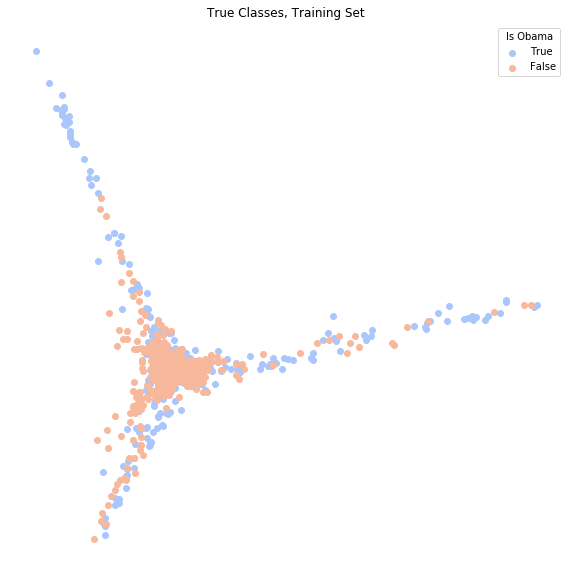

In [15]:
fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
pallet = seaborn.color_palette(palette='coolwarm', n_colors = 2)

#Plot Obama
a = np.stack(train_data_df[train_data_df['category']]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[0], label = "True")

#Plot not Obama
a = np.stack(train_data_df[train_data_df['category'].eq(False)]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[1], label = "False")
    
ax.legend(loc = 'upper right', title = 'Is Obama')
plt.title('True Classes, Training Set')
plt.show()

PCA cannot distinguish Obama very well. Let's perform a screeplot to see how many Principal Components we need.

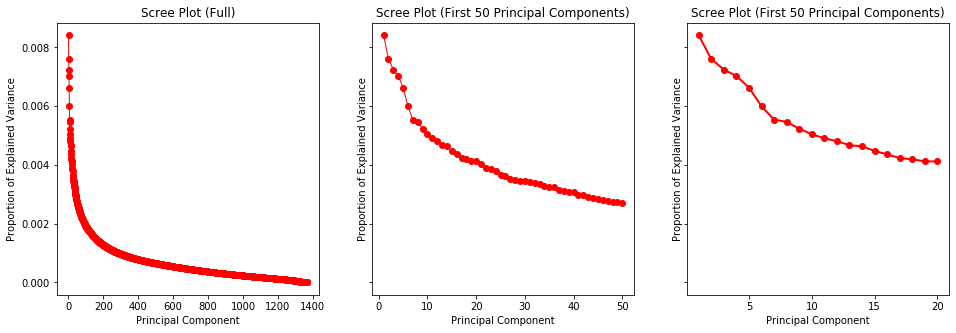

In [16]:
n = len(train_data_df)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (16, 5), sharey=True)

eigen_vals = np.arange(n) + 1
ax1.plot(eigen_vals, pca.explained_variance_ratio_, 'ro-', linewidth=1)
ax1.set_title('Scree Plot (Full)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Explained Variance')

eigen_vals = np.arange(50) + 1
ax2.plot(eigen_vals, pca.explained_variance_ratio_[:50], 'ro-', linewidth=1)
ax2.set_title('Scree Plot (First 50 Principal Components)')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(20) + 1
ax3.plot(eigen_vals, pca.explained_variance_ratio_[:20], 'ro-', linewidth=2)
ax3.set_title('Scree Plot (First 50 Principal Components)')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Proportion of Explained Variance')

plt.show()

Let's choose the first 10 pricipal components as our covariates.

In [17]:
train_data_df['pca_reduced_10'] = train_data_df['pca'].apply(lambda x: x[:10])

Now we fit a logistic regression to our data.

In [18]:
logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Let's see how the logistic regression performs on the training dataset from which we develop the model. Unfortunately, the mean accuracy is only about 64%.

In [19]:
logistic.score(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

0.6666666666666666

How does it perform on the testing dataset, which we "held out" and did not use for model training? We need to repeat all the steps on the testing data, but without retraining:

In [20]:
#Create vectors
TFVects_test = TFVectorizer.transform(test_data_df['text'])
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#PCA
reduced_data_test = pca.transform(np.stack(test_data_df['vect'], axis=0))
test_data_df['pca'] = [r for r in reduced_data_test]
test_data_df['pca_reduced_10'] = test_data_df['pca'].apply(lambda x: x[:10])

#Test
logistic.score(np.stack(test_data_df['pca_reduced_10'], axis=0), test_data_df['category'])

0.6070381231671554

Slightly poorer. How about using more dimensions (40)?

In [21]:
train_data_df['pca_reduced_40'] = train_data_df['pca'].apply(lambda x: x[:40])
test_data_df['pca_reduced_40'] = test_data_df['pca'].apply(lambda x: x[:40])

logistic.fit(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_40'], axis=0), test_data_df['category']))

Training:
0.7448830409356725
Testing:
0.6598240469208211


Or still more (100)?

In [22]:
train_data_df['pca_reduced_100'] = train_data_df['pca'].apply(lambda x: x[:100])
test_data_df['pca_reduced_100'] = test_data_df['pca'].apply(lambda x: x[:100])

logistic.fit(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_100'], axis=0), test_data_df['category']))

Training:
0.8230994152046783
Testing:
0.7302052785923754


Or even more (200)!

In [23]:
train_data_df['pca_reduced_200'] = train_data_df['pca'].apply(lambda x: x[:200])
test_data_df['pca_reduced_200'] = test_data_df['pca'].apply(lambda x: x[:200])

logistic.fit(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_200'], axis=0), test_data_df['category']))

Training:
0.8735380116959064
Testing:
0.7800586510263929


This is becoming ridiculous (400)!

In [24]:
train_data_df['pca_reduced_400'] = train_data_df['pca'].apply(lambda x: x[:400])
test_data_df['pca_reduced_400'] = test_data_df['pca'].apply(lambda x: x[:400])

logistic.fit(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_400'], axis=0), test_data_df['category']))

Training:
0.9130116959064327
Testing:
0.8093841642228738


Increasing the number of covariates would overfit our data, and it seems that using a logistic regression, our prediction accuracy is at best about 65%. We can, however, try a logistic regression that uses the TF-IDF scores for each word, but with an L1 regularization or L1-norm loss function, which is also known as least absolute deviations (LAD), least absolute errors (LAE) or L1 penalty. It minimizes the sum of the absolute differences (S) between the target value ($Y_i$) and the estimated values ($f(x_i)$) and prunes all insignificant variables (i.e., word TF-IDF scores):

$S=\sum^n_{i=1}|y_i=f(x_i)|$

The result is a model retaining only the most individually significant features.

In [25]:
logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l2')
logistic_l1.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])
print(logistic_l1.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))

0.9678362573099415


Train the model using training data, and then test it on the testing data.

In [26]:
print(logistic_l1.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

0.8211143695014663


81% accuracy seems like the best we can get by using a logistic regression.

Now let's try with Naive Bayes. Classically, it is trained with word counts, but TF-IDF vectors are also quite good:

In [27]:
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [28]:
print("Training:")
print(naiveBayes.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
print("Testing:")
print(naiveBayes.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

Training:
0.9597953216374269
Testing:
0.873900293255132


A bit better than the logit, but that's just looking at the accuracy. What about other measures? Let's first save the predictions in the dataframe to save use rerunning the model every time:

In [29]:
test_data_df['nb_predict'] = naiveBayes.predict(np.stack(test_data_df['vect'], axis=0))
test_data_df['nb_predict_prob_true'] = naiveBayes.predict_proba(np.stack(test_data_df['vect'], axis=0))[:,0] #other is prop false

Precision:

In [30]:
sklearn.metrics.precision_score(test_data_df['category'], test_data_df['nb_predict'])

0.8590604026845637

Recall:

In [31]:
sklearn.metrics.recall_score(test_data_df['category'], test_data_df['nb_predict'])

0.8533333333333334

F1-measure:

In [32]:
sklearn.metrics.f1_score(test_data_df['category'], test_data_df['nb_predict'])

0.8561872909698997

Let's take a look at how well our posterior distribution looks relative to the truth.

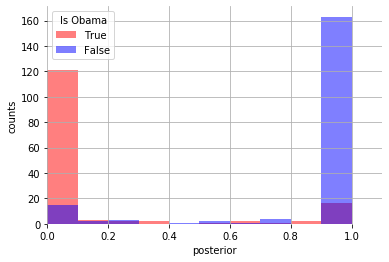

In [33]:
fig, ax = plt.subplots()
ax.grid(False)
ax.set_frame_on(False)
test_data_df[test_data_df['category'].eq(True)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'True', color = 'red')
test_data_df[test_data_df['category'].eq(False)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'False', color = 'blue')
ax.set_xlim((0,1.1))
ax.legend(title = "Is Obama")
ax.set_xlabel('posterior')
ax.set_ylabel('counts')
plt.show()

The classification is suprisingly accurate. We can even look at what words are most influential with a bit of simple math:

In [34]:
#Top indices
trueVals, falseVals = naiveBayes.feature_log_prob_

words_dict = {
    'Obama' : [],
    'Obama_log_prob' : [],
    'Clinton' : [],
    'Clinton_log_prob' : [],
}

for i, prob in sorted(enumerate(trueVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Obama'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Obama_log_prob'].append(prob)

for i, prob in sorted(enumerate(falseVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Clinton'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Clinton_log_prob'].append(prob)
    
pandas.DataFrame(words_dict)

Obama  Obama_log_prob    Clinton  Clinton_log_prob
0      signature       -2.209632       5566         -1.807932
1         ground       -2.316241        amy         -1.818861
2       welcomed       -2.316241     monday         -1.887070
3         urging       -2.341559   brundage         -1.910880
4             fy       -2.380780       dick         -1.935272
5          class       -2.394203    chicago         -1.998988
6   construction       -2.435588  temporary         -2.218847
7          urban       -2.449773      cases         -2.269278
8         having       -2.464162  practices         -2.269278
9   improvements       -2.464162   location         -2.286670
10   association       -2.478760  oversight         -2.286670
11         floor       -2.478760   reported         -2.286670
12         panel       -2.478760     reform         -2.304369
13          read       -2.478760         va         -2.304369
14         child       -2.493575  interests         -2.322388

## Multinomial Naive Bayes

What if we want to classify our text into one of *many* classes? The multinomial Naive Bayes generating model assumes that document features (e.g., words) are generated by draws from a multinomial distribution (recall this gives the probability to observe a particular pattern of counts across features). 

Let's use again the dataset we used in week 3, the 20 newsgroup dataset.

In [34]:
newsgroups = sklearn.datasets.fetch_20newsgroups(data_home = '../data') #Free data to play with: documents from a newsgroup corpus.
newsgroups.target_names #Possible categories, i.e., the newsgroups

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

We can pick specific categories, and pull the relevant training and testing sets. 

In [35]:
target_categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics'] #Can change these of course

newsgroupsDF = pandas.DataFrame(columns = ['text', 'category', 'source_file'])
for category in target_categories:
    print("Loading data for: {}".format(category))
    ng = sklearn.datasets.fetch_20newsgroups(categories = [category], remove=['headers', 'footers', 'quotes'], data_home = '../data')
    newsgroupsDF = newsgroupsDF.append(pandas.DataFrame({'text' : ng.data, 'category' : [category] * len(ng.data), 'source_file' : ng.filenames}), ignore_index=True)

Loading data for: talk.religion.misc
Loading data for: soc.religion.christian
Loading data for: sci.space
Loading data for: comp.graphics


Now we need to tokenize, and make a training and testing set:

In [36]:
newsgroupsDF['tokenized_text'] = newsgroupsDF['text'].apply(lambda x: lucem_illud.word_tokenize(x))
newsgroupsDF['normalized_text'] = newsgroupsDF['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x))

In [69]:
newsgroupsDF['category'].value_counts()

soc.religion.christian    599
sci.space                 593
comp.graphics             584
talk.religion.misc        377
Name: category, dtype: int64

In [41]:
holdBackFraction = .2
train_ng_df, test_ng_df = lucem_illud.trainTestSplit(newsgroupsDF, holdBackFraction=holdBackFraction)

In [42]:
print(len(train_ng_df))
print(len(test_ng_df))

1723
430


We need to extract features from the text. We can use built-in feature extraction to do so. We will use a tf-idf vectorizer, which converts the document into a vector of words with tf-idf weights (term-frequency inverse-document frequency). This gives high weight to words that show up a lot in a given document, but rarely across documents in the corpus (more distinctive). 

In [43]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['text'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

Now we can train the model:

In [44]:
MultinomialNB_ng = sklearn.naive_bayes.MultinomialNB()
MultinomialNB_ng.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

...and save predictions to the dataframe:

In [45]:
train_ng_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(train_ng_df['vect'], axis=0))
print("Training score:")
print(MultinomialNB_ng.score(np.stack(train_ng_df['vect'], axis=0), train_ng_df['category']))

Training score:
0.8914683691236216


In [46]:
train_ng_df[['category', 'nb_predict']][:10]

category              nb_predict
1066               sci.space               sci.space
210       talk.religion.misc      talk.religion.misc
478   soc.religion.christian  soc.religion.christian
706   soc.religion.christian  soc.religion.christian
1378               sci.space               sci.space
781   soc.religion.christian  soc.religion.christian
1363               sci.space               sci.space
1558               sci.space               sci.space
1400               sci.space               sci.space
1959           comp.graphics           comp.graphics

Looks pretty good, lets examine the testing dataset:

In [47]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['text'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(MultinomialNB_ng.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Testing score:
0.8093023255813954


We can even use a confusion matrix, like we used last week for evaluating human coders relative to one another. Now we are evaluating our classifier relative to human coding. We'll just use the one in `lucem_illud_2020`, which requres a classifier and a dataframe with `'vect'` and `'category'` columns, like we have in the examples:

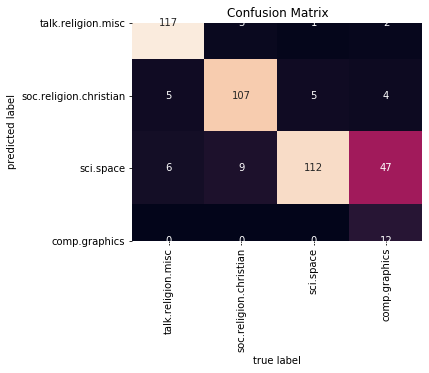

In [48]:
lucem_illud.plotConfusionMatrix(MultinomialNB_ng, test_ng_df)

Let's calculate the precision, recall, and F-measures.

In [51]:
print(sklearn.metrics.precision_score(test_ng_df['category'], test_ng_df['nb_predict'], average = 'weighted')) #precision
print(sklearn.metrics.recall_score(test_ng_df['category'], test_ng_df['nb_predict'], average = 'weighted')) #recall
print(sklearn.metrics.f1_score(test_ng_df['category'], test_ng_df['nb_predict'], average = 'weighted')) #F-1 measure

0.8556779662980443
0.8093023255813954
0.7819053461142227


We can evaluate these per catagory. This has the same requiments as `plotConfusionMatrix`:

In [52]:
lucem_illud.metrics.evaluateClassifier(MultinomialNB_ng, test_ng_df)

Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                     
soc.religion.christian    0.158140  0.875217   0.643678           0.624902   
talk.religion.misc        0.123256  0.592308   1.000000           0.307871   
sci.space                 0.060465  0.927072   0.884298           0.823032   
comp.graphics             0.039535  0.947097   0.951220           0.895055   

                          Recall  
Category                          
soc.religion.christian  0.949153  
talk.religion.misc      0.184615  
sci.space               0.899160  
comp.graphics           0.914062

We can also plot the ROC curves. This has the same requiments as `plotConfusionMatrix`:

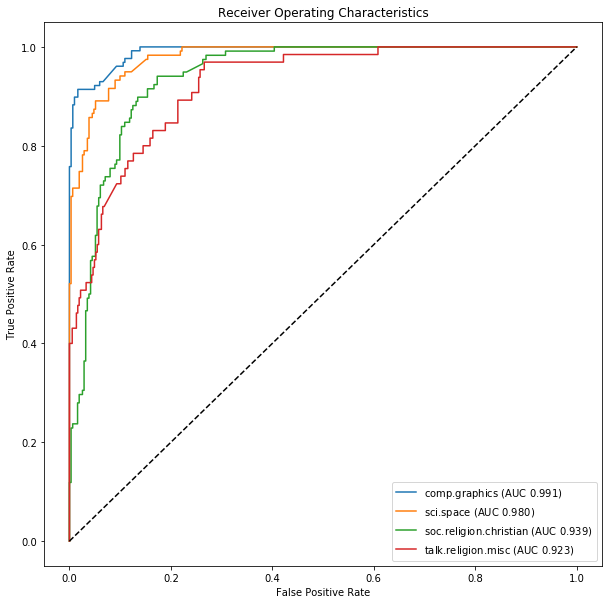

In [53]:
lucem_illud.plotMultiROC(MultinomialNB_ng, test_ng_df)

And we can plot the PCA space visualization:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

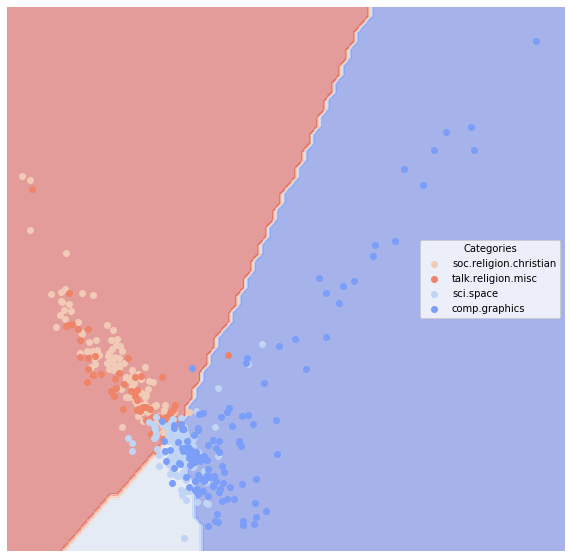

In [54]:
lucem_illud.plotregions(MultinomialNB_ng, test_ng_df)

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">In the cells immediately following, perform Logistic and Naïve Bayes classification (binary or multinomial) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project (e.g., these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week). Visualize the confusion matrix for training and testing sets. Calculate precision, recall, the F-measure, and AUC, then perform an ROC visualization. How do these classifiers perform? Exrapolate codes from these models to all uncoded data.


Goal: Microsoft experience a CEO turnover in 2014. I want to see if prediction algorithms can predict whether glassdoor company reviews are posted before or after 2014.

In [17]:
df = pandas.read_csv('microsoft3.csv', index_col=0)

In [3]:
df.head()

year                                               text
Place                                                             
microsoft  2018  Microsoft Culture, role impact, mission driven...
microsoft  2018  Technical Account Manager Great company and Gr...
microsoft  2018  Great company Benefits, work-life balance, ton...
microsoft  2018  Great Company to work for Smart people, work l...
microsoft  2018  Great company to work for! Amazing benefits, c...

In [10]:
df['year'].value_counts()

2015    2805
2016    2626
2017    2364
2014    2073
2018    1765
2013    1559
2012    1238
2011     371
2008     274
2010     214
2009     139
Name: year, dtype: int64

In [18]:
#let's only keep year 2015, 2016 and 2013, 2012
keep = [2012, 2013, 2015, 2016]
df = df.loc[df['year'].isin(keep)]

#to shorten computtation time, only randomly select 500 data point from each year
df = df.groupby('year').apply(lambda x: x.sample(500)).reset_index(drop=True)

In [19]:
df['year'].value_counts()

2016    500
2015    500
2013    500
2012    500
Name: year, dtype: int64

In [20]:
# add a categorical variable. True if year > 2014. False if year < 2014.
df['category'] = [s > 2014 for s in df['year']]

In [21]:
df['category'].value_counts()

True     1000
False    1000
Name: category, dtype: int64

In [22]:
df['tokenized_text'] = df['text'].apply(lambda x: lucem_illud.word_tokenize(x))
df['normalized_text'] = df['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x))

In [23]:
holdBackFraction = .2
train_data_df, test_data_df = lucem_illud.trainTestSplit(df, holdBackFraction=holdBackFraction)

In [24]:
print(len(train_data_df))
print(len(test_data_df))

1600
400


Logistic regression

In [25]:
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform([' '.join(l) for l in train_data_df['normalized_text']])

In [26]:
TFVects.shape

(1600, 2539)

In [27]:
train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

In [28]:
pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(train_data_df['vect'], axis=0))

In [29]:
train_data_df['pca'] = [r for r in reduced_data]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


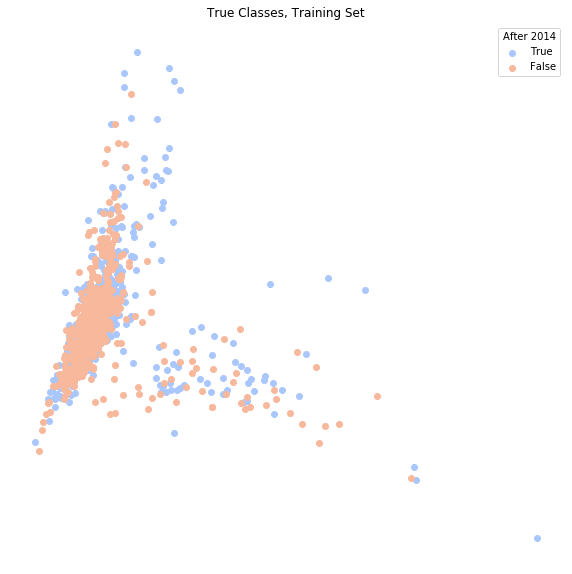

In [30]:
fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
pallet = seaborn.color_palette(palette='coolwarm', n_colors = 2)

#Plot after 2014
a = np.stack(train_data_df[train_data_df['category']]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[0], label = "True")

#Plot before 2014
a = np.stack(train_data_df[train_data_df['category'].eq(False)]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[1], label = "False")
    
ax.legend(loc = 'upper right', title = 'After 2014')
plt.title('True Classes, Training Set')
plt.show()

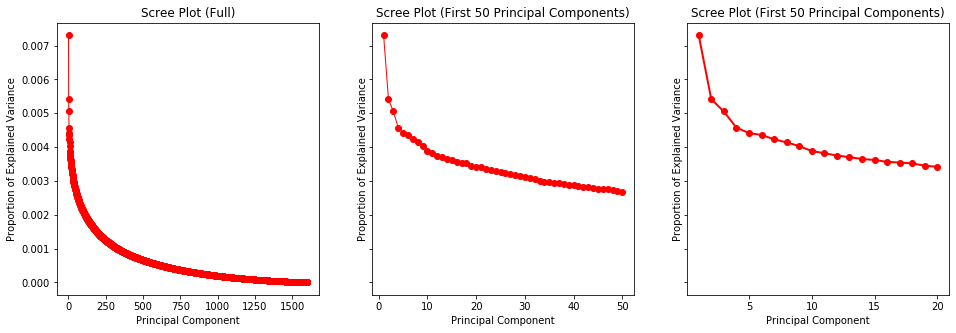

In [95]:
n = len(train_data_df)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (16, 5), sharey=True)

eigen_vals = np.arange(n) + 1
ax1.plot(eigen_vals, pca.explained_variance_ratio_, 'ro-', linewidth=1)
ax1.set_title('Scree Plot (Full)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Explained Variance')

eigen_vals = np.arange(50) + 1
ax2.plot(eigen_vals, pca.explained_variance_ratio_[:50], 'ro-', linewidth=1)
ax2.set_title('Scree Plot (First 50 Principal Components)')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(20) + 1
ax3.plot(eigen_vals, pca.explained_variance_ratio_[:20], 'ro-', linewidth=2)
ax3.set_title('Scree Plot (First 50 Principal Components)')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Proportion of Explained Variance')

plt.show()

In [31]:
train_data_df['pca_reduced_10'] = train_data_df['pca'].apply(lambda x: x[:10])

In [32]:
logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
logistic.score(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

0.57625

In [34]:
#Create vectors
TFVects_test = TFVectorizer.transform([' '.join(l) for l in test_data_df['normalized_text']])
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#PCA
reduced_data_test = pca.transform(np.stack(test_data_df['vect'], axis=0))
test_data_df['pca'] = [r for r in reduced_data_test]
test_data_df['pca_reduced_10'] = test_data_df['pca'].apply(lambda x: x[:10])

#Test
logistic.score(np.stack(test_data_df['pca_reduced_10'], axis=0), test_data_df['category'])

0.5775

In [100]:
train_data_df['pca_reduced_40'] = train_data_df['pca'].apply(lambda x: x[:40])
test_data_df['pca_reduced_40'] = test_data_df['pca'].apply(lambda x: x[:40])

logistic.fit(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_40'], axis=0), test_data_df['category']))

Training:
0.626875
Testing:
0.615


In [35]:
train_data_df['pca_reduced_100'] = train_data_df['pca'].apply(lambda x: x[:100])
test_data_df['pca_reduced_100'] = test_data_df['pca'].apply(lambda x: x[:100])

logistic.fit(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_100'], axis=0), test_data_df['category']))

Training:
0.674375
Testing:
0.605


In [36]:
logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l2')
logistic_l1.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])
print(logistic_l1.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))

0.8925


In [37]:
print(logistic_l1.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

0.615


Naive Bayes

In [38]:
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [39]:
print("Training:")
print(naiveBayes.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
print("Testing:")
print(naiveBayes.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

Training:
0.79125
Testing:
0.6125


In [40]:
test_data_df['nb_predict'] = naiveBayes.predict(np.stack(test_data_df['vect'], axis=0))
test_data_df['nb_predict_prob_true'] = naiveBayes.predict_proba(np.stack(test_data_df['vect'], axis=0))[:,0] #other is prop false

In [41]:
sklearn.metrics.precision_score(test_data_df['category'], test_data_df['nb_predict'])

0.5703422053231939

In [42]:
sklearn.metrics.recall_score(test_data_df['category'], test_data_df['nb_predict'])

0.78125

In [43]:
sklearn.metrics.f1_score(test_data_df['category'], test_data_df['nb_predict'])

0.6593406593406593

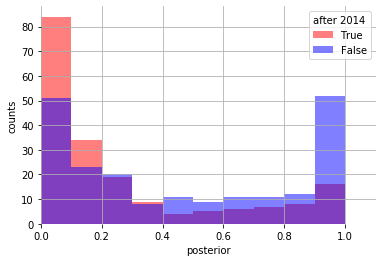

In [44]:
fig, ax = plt.subplots()
ax.grid(False)
ax.set_frame_on(False)
test_data_df[test_data_df['category'].eq(True)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'True', color = 'red')
test_data_df[test_data_df['category'].eq(False)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'False', color = 'blue')
ax.set_xlim((0,1.1))
ax.legend(title = "after 2014")
ax.set_xlabel('posterior')
ax.set_ylabel('counts')
plt.show()

In [45]:
#Top indices
trueVals, falseVals = naiveBayes.feature_log_prob_

words_dict = {
    'after2014' : [],
    'after2014_log_prob' : [],
    'before2014' : [],
    'before2014_log_prob' : [],
}

for i, prob in sorted(enumerate(trueVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['after2014'].append(TFVectorizer.get_feature_names()[i])
    words_dict['after2014_log_prob'].append(prob)

for i, prob in sorted(enumerate(falseVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['before2014'].append(TFVectorizer.get_feature_names()[i])
    words_dict['before2014_log_prob'].append(prob)
    
pandas.DataFrame(words_dict)

after2014  after2014_log_prob    before2014  before2014_log_prob
0        stack           -2.414404          lack            -2.745791
1        leave           -2.566210    leadership            -2.745791
2    political           -2.599546          nice            -2.765209
3        start           -2.599546           old            -2.765209
4    excellent           -2.634032         think            -2.785011
5   innovation           -2.634032          feel            -2.825833
6        build           -2.651732        reward            -2.846887
7         know           -2.706792          look            -2.868393
8        amaze           -2.725840       program            -2.868393
9       health           -2.745258          help            -2.890372
10        look           -2.745258          area            -2.912845
11        nice           -2.745258          base            -2.912845
12    resource           -2.745258          easy            -2.912845
13      reward           -2.745258          hire            -2.935834
14        lead           -2.765060  organization            -2.935834

Looks like Naive Bayes and logistic models have similar accuracy on testing dataset.

Multinomial Naive Bayes

In [46]:
df2 =df.copy()

#this time, assign each post's year as category. The goal is 
#to predict which year that the review is posted
df2['category'] = df2['year'].astype('category')

In [47]:
df2['category'].value_counts()

2016    500
2015    500
2013    500
2012    500
Name: category, dtype: int64

In [48]:
df2['tokenized_text'] = df2['text'].apply(lambda x: lucem_illud.word_tokenize(x))
df2['normalized_text'] = df2['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x))

In [49]:
holdBackFraction = .3
train_ng_df, test_ng_df = lucem_illud.trainTestSplit(df2, holdBackFraction=holdBackFraction)

In [50]:
print(len(train_ng_df))
print(len(test_ng_df))

1400
600


In [51]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform([' '.join(l) for l in train_ng_df['normalized_text']])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

In [52]:
MultinomialNB_ng = sklearn.naive_bayes.MultinomialNB()
MultinomialNB_ng.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [53]:
train_ng_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(train_ng_df['vect'], axis=0))
print("Training score:")
print(MultinomialNB_ng.score(np.stack(train_ng_df['vect'], axis=0), train_ng_df['category']))

Training score:
0.8628571428571429


In [54]:
train_ng_df[['category', 'nb_predict']][:10]

category  nb_predict
1730     2016        2016
832      2013        2013
28       2012        2012
1818     2016        2016
468      2012        2015
440      2012        2012
428      2012        2012
1438     2015        2015
1493     2015        2015
1298     2015        2015

In [55]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform([' '.join(l) for l in test_ng_df['normalized_text']])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(MultinomialNB_ng.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Testing score:
0.32166666666666666


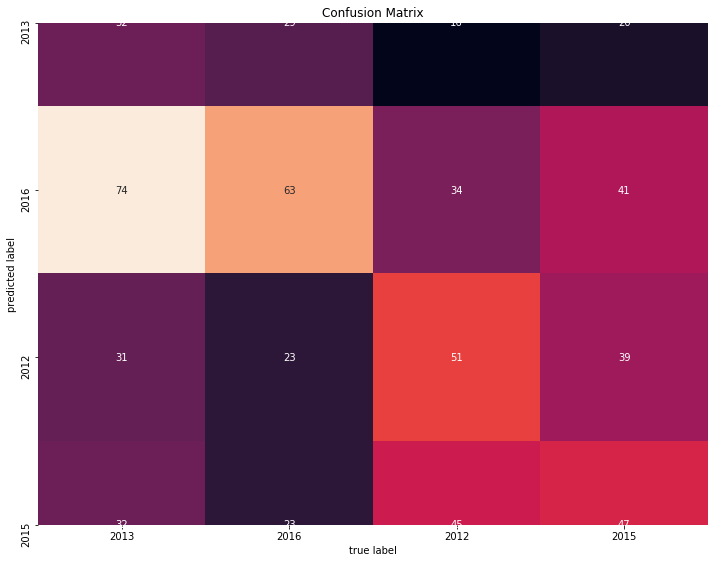

In [56]:
plt.figure(figsize=(12,12))
lucem_illud.plotConfusionMatrix(MultinomialNB_ng, test_ng_df)

In [57]:
print(sklearn.metrics.precision_score(test_ng_df['category'], test_ng_df['nb_predict'], average = 'weighted')) #precision
print(sklearn.metrics.recall_score(test_ng_df['category'], test_ng_df['nb_predict'], average = 'weighted')) #recall
print(sklearn.metrics.f1_score(test_ng_df['category'], test_ng_df['nb_predict'], average = 'weighted')) #F-1 measure

0.32578390769197524
0.32166666666666666
0.3144889637887823


In [58]:
lucem_illud.metrics.evaluateClassifier(MultinomialNB_ng, test_ng_df)

Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
2016        0.333333  0.549489   0.319728           0.268893  0.319728
2012        0.336667  0.519269   0.329897           0.290799  0.189349
2013        0.373333  0.567005   0.297170           0.260664  0.456522
2015        0.313333  0.572235   0.354167           0.282049  0.349315

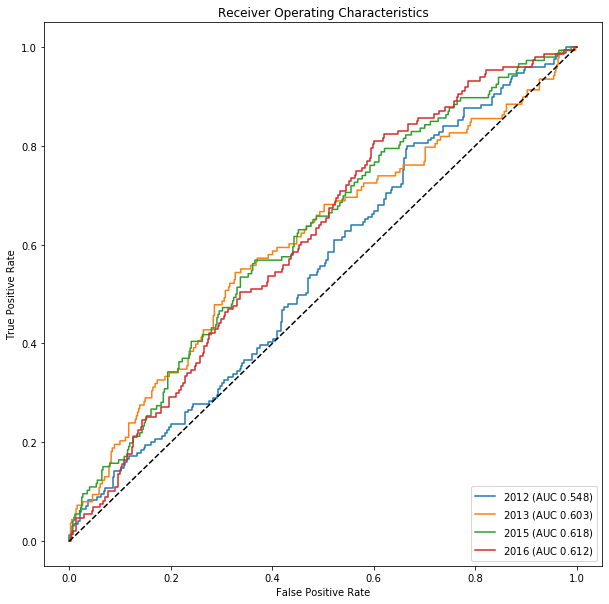

In [59]:
lucem_illud.plotMultiROC(MultinomialNB_ng, test_ng_df)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

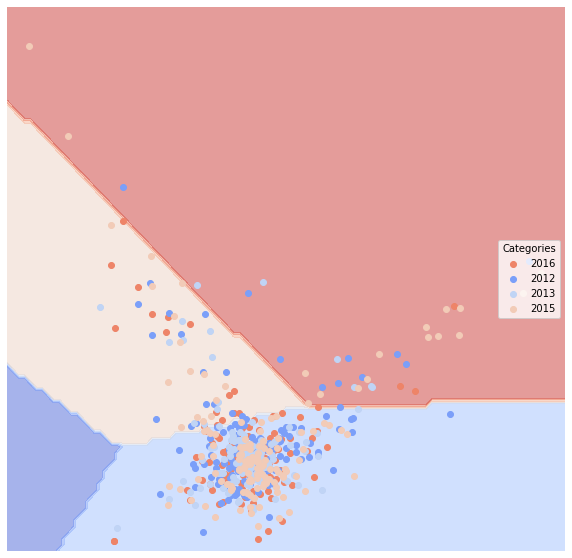

In [60]:
lucem_illud.plotregions(MultinomialNB_ng, test_ng_df)

The error rate is really high for multinomial Naive Bayes. It is probably because the reviews between 2012 and 2013 (2015 and 2016) are very similar.

# Decision Trees

Decision trees can be used to predict both categorical/class labels (i.e., classification) and continuous labels (i.e., regression).

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

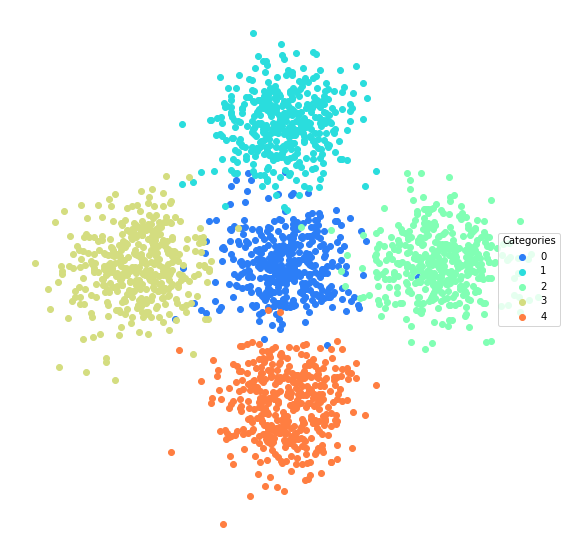

In [55]:
blobs_df = lucem_illud.multiBlobs(noise=.2, centers=[(0,0), (0,5), (5,0), (-5,0), (0,-5)])
df_exampleTree_train, df_exampleTree_test = lucem_illud.trainTestSplit(blobs_df)
lucem_illud.plotter(df_exampleTree_train)

Now we import our Decision Tree classifier from sklearn.tree (familiar syntax) and fit it using the fit method.

In [56]:
clf_tree = sklearn.tree.DecisionTreeClassifier(max_depth=4,random_state=0)
clf_tree.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

To see what's going on visually with the classification: 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

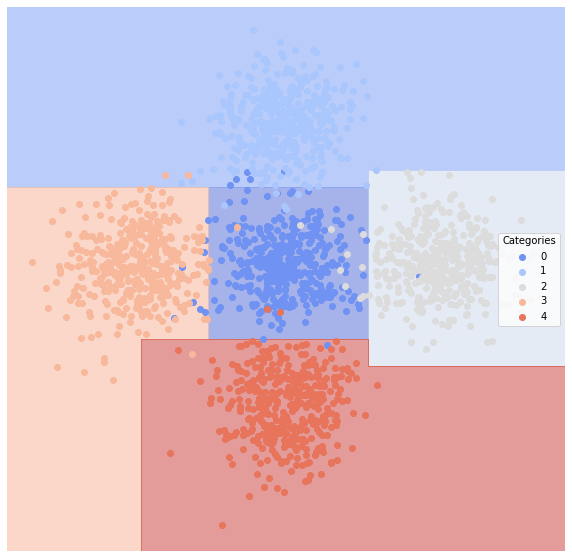

In [58]:
lucem_illud.plotregions(clf_tree, df_exampleTree_train)

In [59]:
lucem_illud.evaluateClassifier(clf_tree, df_exampleTree_test)

Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.018  0.977231   0.940594           0.917800  0.969388
1              0.010  0.979687   0.990196           0.960474  0.961905
2              0.008  0.986899   0.978723           0.961900  0.978723
3              0.006  0.988846   0.990000           0.974396  0.980198
4              0.002  0.998744   0.990291           0.990291  1.000000

Lets look at accuracy:

In [60]:
sklearn.metrics.accuracy_score(df_exampleTree_test['category'],clf_tree.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))

0.978

What happens if we trim the tree?

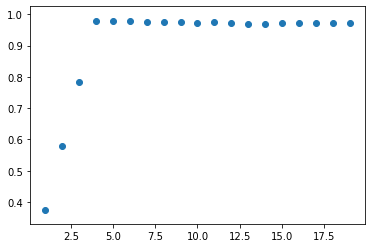

In [61]:
depthvec = []
scorevec = []
for i in range(1,20):
    tree2 = sklearn.tree.DecisionTreeClassifier(max_depth=i,random_state=0)
    tree2.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])
    score = sklearn.metrics.accuracy_score(df_exampleTree_test['category'], tree2.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))
    depthvec.append(i)
    scorevec.append(score)
plt.scatter(depthvec,scorevec)
plt.show()

We can select different layers of the decision tree or "prune" it. At approximately four layers down in the decision tree, the shape is somewhat odd, suggesting that our model is overfitting beyond those four layers.

Combining multiple overfitting estimators turns out to be a key idea in machine learning. This is called **bagging** and is a type of **ensemble** method. The idea is to make many randomized estimators--each can overfit, as decision trees are wont to do--but then to combine them, ultimately producing a better classification. A **random forest** is produced by bagging decision trees.

In [62]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth=10) #Create an instance of our decision tree classifier.

bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) #Each tree uses up to 80% of the data

In [63]:
bag.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category']) #Fit the bagged classifier

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=10,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
      

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

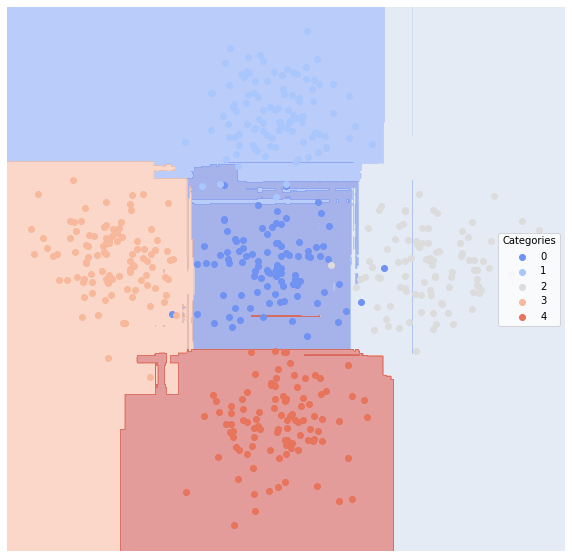

In [64]:
lucem_illud.plotregions(bag, df_exampleTree_test)

In [65]:
lucem_illud.evaluateClassifier(bag, df_exampleTree_test)

Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.020  0.968271   0.948980           0.910562  0.948980
1              0.012  0.978421   0.980583           0.951227  0.961905
2              0.006  0.992218   0.978947           0.970533  0.989362
3              0.002  0.998747   0.990196           0.990196  1.000000
4              0.000  1.000000   1.000000           1.000000  1.000000

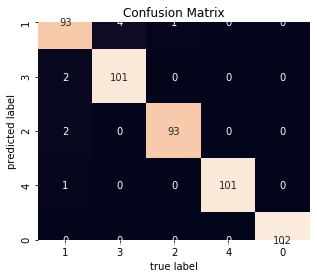

In [66]:
lucem_illud.plotConfusionMatrix(bag, df_exampleTree_test)

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">In the cells immediately following, perform decision tree and random forest classification (binary, multinomial or continuous) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. As with ***Exercise 2***, these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week. Visualize the classification of data points. Calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Now build an ensemble classifier by bagging trees into a random forest. Visualize the result. How do these classifiers perform? What does ensemble learning do?

In [37]:
df.head()

year                                               text  category  \
0  2012  Great Package Comes with Great Stress Fantasti...     False   
1  2012  Great place to work If you are a software engi...     False   
2  2012  Microsoft Great benefits , great health care, ...     False   
3  2012  no job security, unable to see the light at th...     False   
4  2012  Great place to work for long term Tons of inte...     False   

                                      tokenized_text  \
0  [Great, Package, Comes, with, Great, Stress, F...   
1  [Great, place, to, work, If, you, are, a, soft...   
2  [Microsoft, Great, benefits, great, health, ca...   
3  [no, job, security, unable, to, see, the, ligh...   
4  [Great, place, to, work, for, long, term, Tons...   

                                     normalized_text  
0  [great, package, come, great, stress, fantasti...  
1  [great, place, work, software, engineer, wil, ...  
2  [microsoft, great, benefit, great, health, car...  
3  [job, security, unable, light, end, tunnel, lo...  
4  [great, place, work, long, term, ton, interest...

In [61]:
holdBackFraction = .3


df_exampleTree_train, df_exampleTree_test = lucem_illud.trainTestSplit(df,holdBackFraction=holdBackFraction)



In [62]:
#Create vectors
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')

TFVects_train = TFVectorizer.fit_transform([' '.join(l) for l in df_exampleTree_train['normalized_text']])
df_exampleTree_train['vect'] = [np.array(v).flatten() for v in TFVects_train.todense()]

TFVects_test = TFVectorizer.transform([' '.join(l) for l in df_exampleTree_test['normalized_text']])
df_exampleTree_test['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

In [63]:
clf_tree = sklearn.tree.DecisionTreeClassifier(max_depth=4,random_state=0)
clf_tree.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


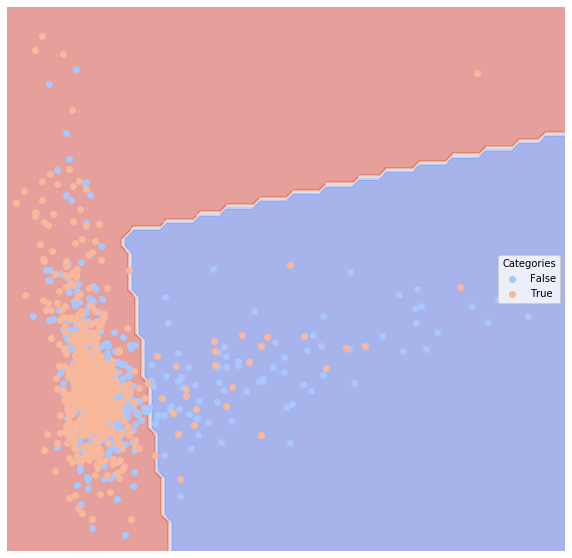

In [64]:
lucem_illud.plotregions(clf_tree, df_exampleTree_train)

In [65]:
lucem_illud.evaluateClassifier(clf_tree, df_exampleTree_test)

Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
False       0.466667  0.544565   0.791667           0.547673  0.123377
True        0.466667  0.544565   0.510870           0.510041  0.965753

This is just sad. Decision tree does not perform well. It is almost close to random guessing (50% baseline)

In [66]:
sklearn.metrics.accuracy_score(df_exampleTree_test['category'],clf_tree.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))

0.5333333333333333

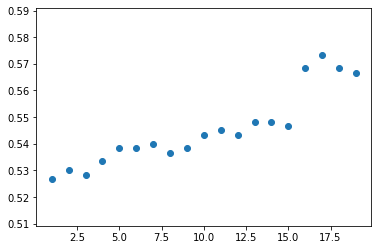

In [67]:
depthvec = []
scorevec = []
for i in range(1,20):
    tree2 = sklearn.tree.DecisionTreeClassifier(max_depth=i,random_state=0)
    tree2.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])
    score = sklearn.metrics.accuracy_score(df_exampleTree_test['category'], tree2.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))
    depthvec.append(i)
    scorevec.append(score)
plt.scatter(depthvec,scorevec)
plt.show()

Random Forest

In [68]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth=10) #Create an instance of our decision tree classifier.

bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) #Each tree uses up to 80% of the data

In [71]:
bag.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category']) #Fit the bagged classifier

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=10,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
      

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


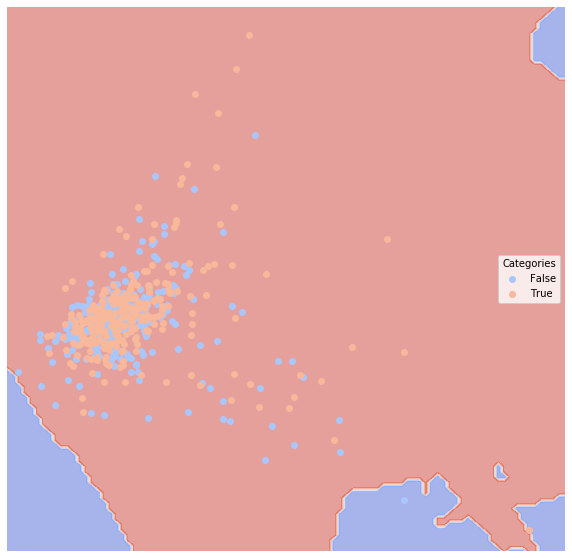

In [72]:
lucem_illud.plotregions(bag, df_exampleTree_test)

In [73]:
lucem_illud.evaluateClassifier(bag, df_exampleTree_test)

Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
False           0.39  0.614259   0.679612           0.588914  0.454545
True            0.39  0.614259   0.573604           0.553954  0.773973

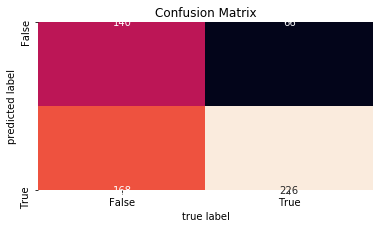

In [74]:
lucem_illud.plotConfusionMatrix(bag, df_exampleTree_test)

Random Forest also does not perform well.

# K-Nearest Neighbors

The K-Nearest neighbors classifier takes a simpler premise than those before: Find the closest labeled datapoint in set and "borrow" its label.

Let's use newsgroup data again.

In [67]:
newsgroupsDF[:5]

text            category  \
0  \n\nParadise and salvation are not the same th...  talk.religion.misc   
1  \nYou're admitting a lot more than that.  You ...  talk.religion.misc   
2  \n\nJesus also recognized other holy days, lik...  talk.religion.misc   
3  In <lsjc8cINNmc1@saltillo.cs.utexas.edu> turpi...  talk.religion.misc   
4  \nI'm sorry, but He does not!  Ever read the F...  talk.religion.misc   

                                         source_file  \
0  ../data/20news_home/20news-bydate-train/talk.r...   
1  ../data/20news_home/20news-bydate-train/talk.r...   
2  ../data/20news_home/20news-bydate-train/talk.r...   
3  ../data/20news_home/20news-bydate-train/talk.r...   
4  ../data/20news_home/20news-bydate-train/talk.r...   

                                      tokenized_text  \
0  [Paradise, and, salvation, are, not, the, same...   
1  [You, 're, admitting, a, lot, more, than, that...   
2  [Jesus, also, recognized, other, holy, days, l...   
3  [In, <, lsjc8cINNmc1@saltillo.cs.utexas.edu, >...   
4  [I, 'm, sorry, but, He, does, not, Ever, read,...   

                                     normalized_text  
0  [paradise, salvation, thing, salvation, well, ...  
1  [admit, lot, admit, moral, situational, admit,...  
2  [jesus, recognize, holy, day, like, passover, ...  
3  [<, lsjc8cinnmc1@saltillo.cs.utexas.edu, >, tu...  
4                     [be, sorry, read, commandment]

Make a testing and training set:

In [69]:
holdBackFraction = .2
train_ng_df, test_ng_df = lucem_illud.trainTestSplit(newsgroupsDF, holdBackFraction=holdBackFraction)

Let's initialize our k-nearest neighbors classifier:

In [70]:
n_neighbors = 15
weights="uniform"
clf_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

Let's try to classify using the TF-IDF vectors:

In [71]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['text'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

In [72]:
clf_knearest.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [73]:
lucem_illud.evaluateClassifier(clf_knearest, train_ng_df)

Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                     
soc.religion.christian    0.239698  0.565263   1.000000           0.370225   
talk.religion.misc        0.237377  0.616110   0.348974           0.244244   
sci.space                 0.278584  0.627980   0.498753           0.370175   
comp.graphics             0.456181  0.575386   0.324266           0.304470   

                          Recall  
Category                          
soc.religion.christian  0.130526  
talk.religion.misc      0.388889  
sci.space               0.417537  
comp.graphics           0.643629

And lets look at the testing data

In [74]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['text'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['nb_predict'] = clf_knearest.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(clf_knearest.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Testing score:
0.3023255813953488


Let's produce another confusion matrix:

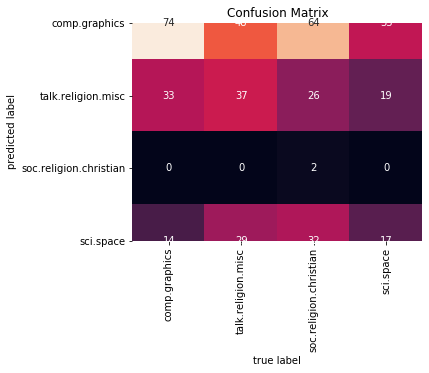

In [75]:
lucem_illud.plotConfusionMatrix(clf_knearest, test_ng_df)

You can produce the PCA space visual if you want, altough it can take a very long time, so we'll leave it optionally commented out:

In [ ]:
#lucem_illud_2020.plotregions(clf_knearest, test_ng_df)

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">In the cells immediately following, perform and visualize k-nearest neighbor classification using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. Visualize the classification of data points and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Articulate how the *k*-nearest neighbor approach relates to *k*-means clustering explored in ***week 3***?

In [75]:
holdBackFraction = .2
train_ng_df, test_ng_df = lucem_illud.trainTestSplit(df, holdBackFraction=holdBackFraction)

In [76]:
n_neighbors = 15
weights="uniform"
clf_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

In [77]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform([' '.join(l) for l in train_ng_df['normalized_text']])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

In [79]:
clf_knearest.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [80]:
lucem_illud.evaluateClassifier(clf_knearest, train_ng_df)

Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
False       0.374375  0.622681   0.873077           0.603672  0.286255
True        0.374375  0.622681   0.577612           0.574617  0.959108

In [81]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform([' '.join(l) for l in test_ng_df['normalized_text']])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['nb_predict'] = clf_knearest.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(clf_knearest.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Testing score:
0.5425


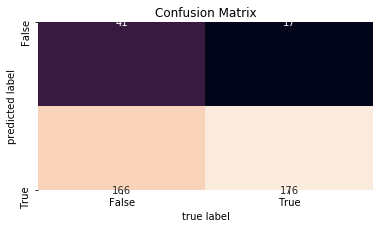

In [82]:
lucem_illud.plotConfusionMatrix(clf_knearest, test_ng_df)

KNN performs better than Decision trees and Random Forest. On par with Naive Bayes and Logistic regression.

# SVMs

Now we will examine Support Vector Machines, an approach that creates the partition that preserves the "maximum margin" between classes.

We will use a few sub forums from reddit--which tend to share text rather than memes--namely `talesfromtechsupport`, `badroommates`, `weeabootales` and `relationships`. The top 100 text posts from each have been saved to `data/reddit.csv`.

In [77]:
redditDf = pandas.read_csv('../data/reddit.csv', index_col = 0)

#Drop a couple missing values

redditDf = redditDf.dropna()

#Set category

redditDf['category'] = redditDf['subreddit']

#tokenize and normalize
redditDf['tokenized_text'] = redditDf['text'].apply(lambda x: lucem_illud.word_tokenize(x))
redditDf['normalized_text'] = redditDf['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x))

We will tf.idf the data to make our vectors:

In [78]:
redditTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, min_df=3, stop_words='english', norm='l2')
redditTFVects = redditTFVectorizer.fit_transform([' '.join(l) for l in redditDf['normalized_text']])
redditDf['vect'] = [np.array(v).flatten() for v in redditTFVects.todense()]

Initilize the model and make a train test split:

In [79]:
holdBackFraction = .2
train_redditDf, test_redditDf = lucem_illud.trainTestSplit(redditDf, holdBackFraction=holdBackFraction)

In [80]:
clf_svm = sklearn.svm.SVC(kernel='linear', probability = False)
#probability = True is slower but  lets you call predict_proba()
clf_svm.fit(np.stack(train_redditDf['vect'], axis=0), train_redditDf['category'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

...and consider the results:

In [81]:
lucem_illud.evaluateClassifier(clf_svm, test_redditDf)

Error_Rate       AUC  \
Category                                                                   
Relationships                                         0.012539  0.980015   
Weeaboo Tales: stories about the extreme fans o...    0.006270  0.991515   
Tales From Tech Support                               0.000000  1.000000   
Bad Roommates: Tales of Irritation                    0.006270  0.995851   

                                                    Precision  \
Category                                                        
Relationships                                        0.987805   
Weeaboo Tales: stories about the extreme fans o...   0.987179   
Tales From Tech Support                              1.000000   
Bad Roommates: Tales of Irritation                   0.975000   

                                                    Average_Precision  \
Category                                                                
Relationships                                                0.961931   
Weeaboo Tales: stories about the extreme fans o...           0.977658   
Tales From Tech Support                                      1.000000   
Bad Roommates: Tales of Irritation                           0.975000   

                                                      Recall  
Category                                                      
Relationships                                       0.964286  
Weeaboo Tales: stories about the extreme fans o...  0.987179  
Tales From Tech Support                             1.000000  
Bad Roommates: Tales of Irritation                  1.000000

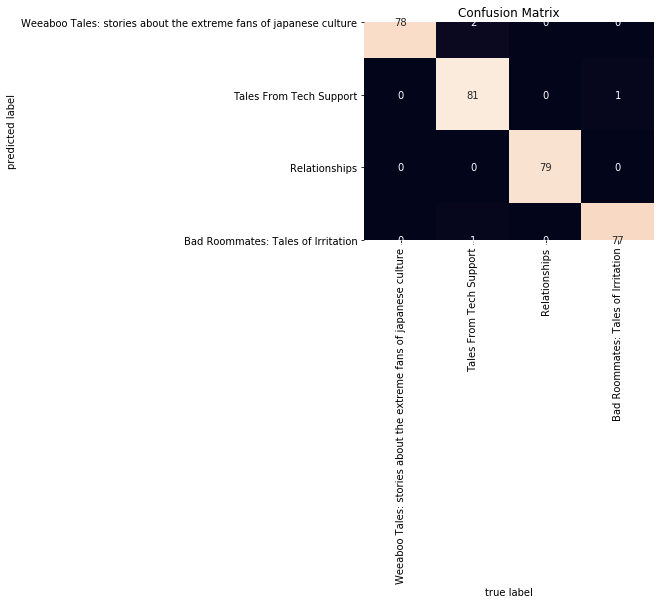

In [82]:
lucem_illud.plotConfusionMatrix(clf_svm, test_redditDf)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

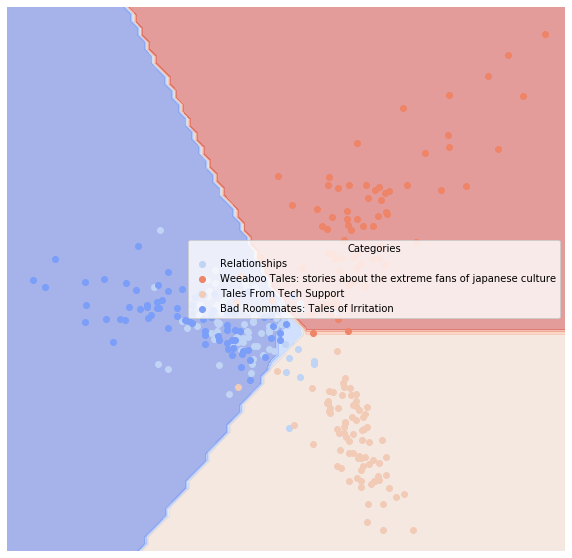

In [83]:
lucem_illud.plotregions(clf_svm, test_redditDf)

# Neural Nets

We include an example of a simple neural network, the Multi-layer Perceptron (MLP) that learns a function $f(\cdot): R^m \rightarrow R^o$ by training on a dataset, where $m$ is the number of dimensions for input and $o$ is the number of dimensions for output. Given a set of features $X = {x_1, x_2, ..., x_m}$ and a target $y$, it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. The following figure shows a one hidden layer MLP with scalar output. ![title](../data/multilayerperceptron_network.png) The leftmost layer, known as the input layer, consists of a set of "neurons" $\{x_i | x_1, x_2, ..., x_m\}$ representing the input features (e.g., weighted words). Each neuron in the hidden layer transforms the values from the previous layer with a weighted linear summation $w_1x_1 + w_2x_2 + ... + w_mx_m$, followed by a non-linear activation function $g(\cdot):R \rightarrow R$ - like the logistic or hyperbolic tan function. The output layer receives the values from the last hidden layer and transforms them into output values.

In [84]:
clf_nn = sklearn.neural_network.MLPClassifier()
clf_nn.fit(np.stack(train_redditDf['vect'], axis=0), train_redditDf['category'])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [85]:
lucem_illud.evaluateClassifier(clf_nn, test_redditDf)

Error_Rate       AUC  \
Category                                                                   
Relationships                                         0.025078  0.963855   
Weeaboo Tales: stories about the extreme fans o...    0.006270  0.995851   
Tales From Tech Support                               0.000000  1.000000   
Bad Roommates: Tales of Irritation                    0.025078  0.966060   

                                                    Precision  \
Category                                                        
Relationships                                        0.963415   
Weeaboo Tales: stories about the extreme fans o...   0.975000   
Tales From Tech Support                              1.000000   
Bad Roommates: Tales of Irritation                   0.948718   

                                                    Average_Precision  \
Category                                                                
Relationships                                                0.921743   
Weeaboo Tales: stories about the extreme fans o...           0.975000   
Tales From Tech Support                                      1.000000   
Bad Roommates: Tales of Irritation                           0.912605   

                                                      Recall  
Category                                                      
Relationships                                       0.940476  
Weeaboo Tales: stories about the extreme fans o...  1.000000  
Tales From Tech Support                             1.000000  
Bad Roommates: Tales of Irritation                  0.948718

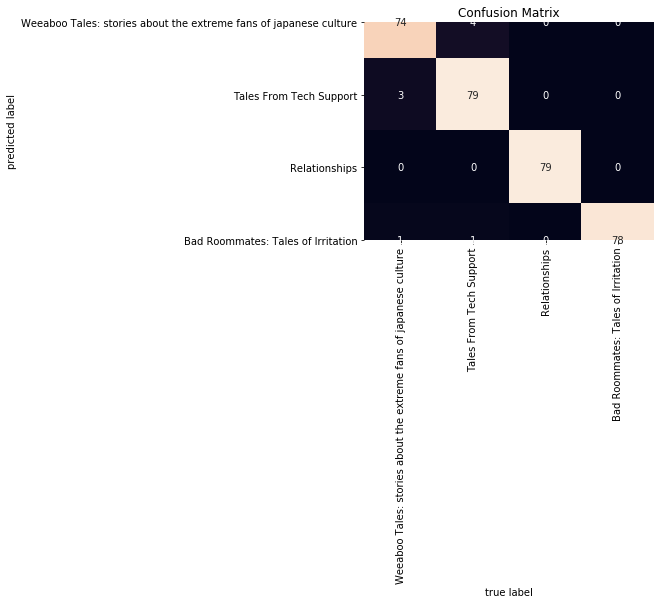

In [86]:
lucem_illud.plotConfusionMatrix(clf_nn, test_redditDf)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

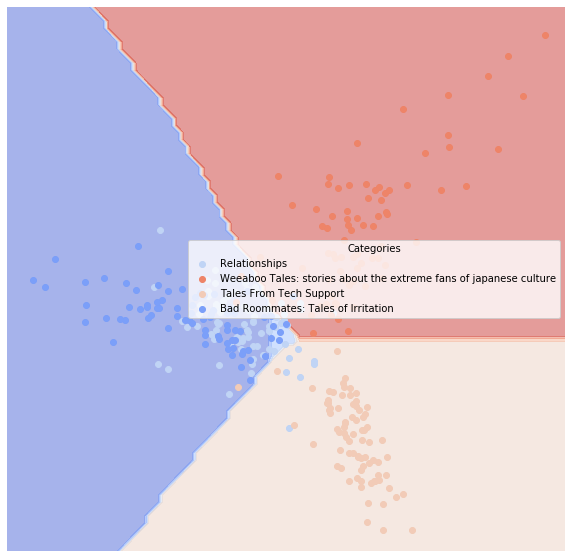

In [87]:
lucem_illud.plotregions(clf_nn, test_redditDf)

It performs very well.

## <span style="color:red">*Exercise 5*</span>

<span style="color:red">In the cells immediately following, perform a neural network classification and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). How does this classify relevant to *k*-nearest neighbor, Naive Bayes, logistic and decision-tree approaches?

In [83]:
df.head()

year                                               text  category  \
0  2012  One of the most disappointing experiences in m...     False   
1  2012  Disheartening - Benefits - Access to technolog...     False   
2  2012  Satisfied with my long tenure in the company O...     False   
3  2012  Surrounded by smart people, but way too compet...     False   
4  2012  Great place Great place to work at, lots of op...     False   

                                      tokenized_text  \
0  [One, of, the, most, disappointing, experience...   
1  [Disheartening, Benefits, Access, to, technolo...   
2  [Satisfied, with, my, long, tenure, in, the, c...   
3  [Surrounded, by, smart, people, but, way, too,...   
4  [Great, place, Great, place, to, work, at, lot...   

                                     normalized_text  
0  [disappoint, experience, professional, life, s...  
1  [dishearten, benefit, access, technology, wron...  
2  [satisfy, long, tenure, company, offer, reason...  
3  [surround, smart, people, way, competitive, go...  
4  [great, place, great, place, work, lot, opport...

In [84]:
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, min_df=3, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform([' '.join(l) for l in df['normalized_text']])
df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

In [85]:
holdBackFraction = .2
train_df, test_df = lucem_illud.trainTestSplit(df, holdBackFraction=holdBackFraction)

In [86]:
clf_svm = sklearn.svm.SVC(kernel='linear', probability = False)
#probability = True is slower but  lets you call predict_proba()
clf_svm.fit(np.stack(train_df['vect'], axis=0), train_df['category'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [87]:
lucem_illud.evaluateClassifier(clf_svm, test_df)

Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
False         0.4075  0.591696   0.595506           0.547924  0.538071
True          0.4075  0.591696   0.590090           0.560797  0.645320

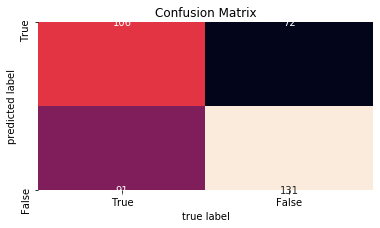

In [88]:
lucem_illud.plotConfusionMatrix(clf_svm, test_df)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


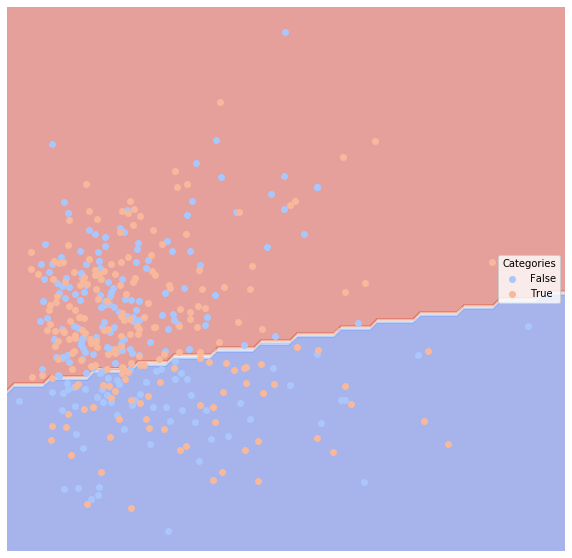

In [89]:
lucem_illud.plotregions(clf_svm, test_df)

Neural nets

In [151]:
clf_nn = sklearn.neural_network.MLPClassifier()
clf_nn.fit(np.stack(train_df['vect'], axis=0), train_df['category'])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [152]:
lucem_illud.evaluateClassifier(clf_nn, test_df)

Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
False         0.3625  0.639408   0.678756           0.623000  0.612150
True          0.3625  0.639408   0.599034           0.554356  0.666667

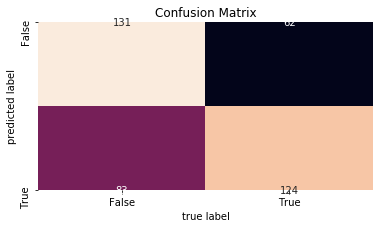

In [153]:
lucem_illud.plotConfusionMatrix(clf_nn, test_df)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


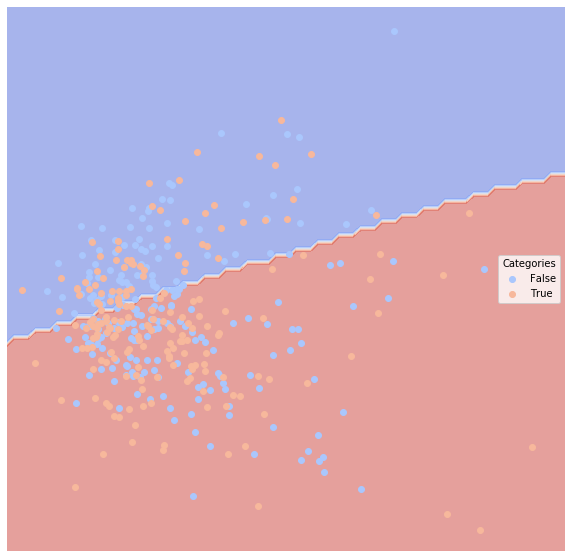

In [154]:
lucem_illud.plotregions(clf_nn, test_df)